## Predicting Car Prices Based on Certain Characteristics
Group 36: Henry Zhang, Moira Renata, Ning Wang, Paige Wills, Xinrui Wang

## **Introduction**

Over the past few decades, we have seen a rapid increase in demand for the car industry. The high market price of both brand new and used cars have created a large economic impact all over the world. Based on previous studies, it was found that there are multiple factors affecting  the final price of a car (Balce, 2016) and that while most factors do have a positive contribution or effect to the final price, there are still some factors that create a negative effect (Erdem and Senturk, 2009). 

Therefore, in this project, we hope to create a model that allows us to predict the final price of a car given its characteristics.

## **Description**

The sample we use is from the The Automobile Data Set that was created by Jeffrey C. Schlimmer in 1985. The author created a data set that consists of 26 columns with 205 rows, where each row refers to one car sample. Out of the 25 columns predictor variables, there are 9  categorical variables and 16 numerical variables. Our response variable is the 26th column, which represents the price of a car in USD($). 

Variable|Type|Description|
|-|-|-|
|symboling|Categorical|Assigned insurance risk rating|
|normalized-losses|Numerical|Relative average loss payment per insured vehicle year in dollars (USD)|
|make|Categorical|Car manufacturer/model|
|fuel-type|Categorical|Type of fuel to power car|
|aspiration|Categorical|Engine aspiration (std, turbo)|
|num-of-doors|Numerical|Number of doors|
|body-style|Categorical|Car's style (sedan, convertible, etc.)|
|drive-wheels|Categorical|amount and location of wheels|
|engine-location|Categorical|Engine location (front, back)|
|wheel-base|Numerical|Horizontal distance between the front and rear wheel in inches.|
|length|Numerical|Length of car in inches|
|width|Numerical|Width of car in inches|
|height|Numerical|Height of car in inches|
|curb-weight|Numerical|Weight of car in pounds|
|engine-type|Categorical|Engine type (dohc, dohcv, etc.)|
|num-of-cylinders|Categorical|Number of cylinders in engine|
|Engine-size|Numerical|Engine size in cubic inches|
|fuel-system|Categorical|Fuel system in car (1bbl, mfi. etc.)|
|bore|Numerical|Diameter of each cylinder in inches|
|stroke|Numerical|Movement of piston in gigapascal|
|compression-ratio|Numerical|Ratio between the cylinder's highest and lowest volumes at the bottom and top of the piston's stroke. |
|horsepower|Numerical|Engine horsepower (hp)|
|peak-rpm|Numerical|RPM at which engine delivers peak horsepower|
|city-mpg|Numerical|Mileage in the city in miles per gallon|
|highway-mpg|Numerical|Mileage in the highway in miles per gallon|
|price|Numerical|Price of car in USD ($)|


## **Preliminary Analysis**

In [1]:
library(tidyverse)
library(leaps)

#remove warning message
oldw <- getOption("warn")

options(warn = -1)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Labelling all the columns
names<-c("symboling","normalized-losses","make","fuel-type","aspiration",
         "num-of-doors","body-style","drive-wheels","engine-location",
        "wheel-base","length","width","height","curb-weight","engine-type",
        "num-of-cylinders","engine-size","fuel-system","bore","stroke",
        "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price")

# Reading the data from the web 
df<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
            col_names=names,col_types = cols(
                symboling = col_factor(),
                `normalized-losses`= col_double(),
                make = col_factor(),
                `fuel-type`= col_factor(),
                aspiration = col_factor(),
                `num-of-doors`= col_factor(),
                `body-style` = col_factor(),
                `drive-wheels` = col_factor(),
                `engine-location` = col_factor(),
                `wheel-base` = col_double(),
                length = col_double(),
                width = col_double(),
                `curb-weight` = col_double(),
                `engine-type` = col_factor(),
                `num-of-cylinders` = col_factor(),
                `engine-size` = col_double(),
                `fuel-system` = col_factor(),
                bore = col_double(),
                stroke = col_double(),
                `compression-ratio` = col_double(),
                horsepower = col_double(),
                `peak-rpm` = col_double(),
                `city-mpg` = col_double(),
                `highway-mpg` = col_double(),
                price = col_double()
                 ))%>%replace("?",NA)
head(df)

symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,?
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,NA
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,NA
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,NA
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,NA
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,NA
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,NA


#### **Tidying our Data**

From the dataframe above, we notice that there are some NA values, and that the last column `?` can be removed as it does not represent anything. Other than that, each row represents an observation, each column is a variable, and each cell is a value, which means there is not a lot of data tidying to do. We will first check the number of NA values in each column, the number of levels in columns that are categorical variables, and the summary statistics of each variable.

In [3]:
# Checking the summary of results of each column
sum_df <- summary(df)
sum_df

 symboling normalized-losses         make      fuel-type   aspiration 
 3 :27     Min.   : 65       toyota    : 32   gas   :185   std  :168  
 1 :54     1st Qu.: 94       nissan    : 18   diesel: 20   turbo: 37  
 2 :32     Median :115       mazda     : 17                           
 0 :67     Mean   :122       honda     : 13                           
 -1:22     3rd Qu.:150       mitsubishi: 13                           
 -2: 3     Max.   :256       subaru    : 12                           
           NA's   :41        (Other)   :100                           
 num-of-doors       body-style drive-wheels engine-location   wheel-base    
 two : 89     convertible: 6   rwd: 76      front:202       Min.   : 86.60  
 four:114     hatchback  :70   fwd:120      rear :  3       1st Qu.: 94.50  
 ?   :  2     sedan      :96   4wd:  9                      Median : 97.00  
              wagon      :25                                Mean   : 98.76  
              hardtop    : 8                   

Based on the above summary statistics, we notice that there are some variables that contain NA values, and that the last column does not contain data. 

In [4]:
#Remove the last column
automobile<-df[,-27]
#Check that the last column is now the response variable
colnames(automobile[,26])
#number of rows in the dataframe
nrow(automobile)
#number of rows in the dataframe after NAs are removed
nrow(na.omit(automobile))

[1] "price"

[1] 205

[1] 160

From above, we can see that there are 45 rows that contain NA values; this is calculated by 205-160.

In [5]:
#print our tidy dataset
head(automobile)

symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### **Exploratory Data Analysis**

Now, we want to calculate the coefficient of determination of all of our predicted variables.

In [6]:
#print out the R^2 (coefficient of determination) of all the variables
r_sqr<-c()
for (x in 1:25){
     r_sqr<-c(r_sqr,summary(lm(unlist(automobile[,26])~unlist(automobile[,x])))$r.squared)

 }

In [7]:
#removes the price variable (response) since we are not calculating the R^2 of it.  
names<-colnames(automobile[,-26])
#create a summary table of the predictor variables with the top 8 highest R^2 values
df_sqr<-cbind(r_sqr,names)%>%as.data.frame()
df_sqr$r_sqr<-as.numeric(df_sqr$r_sqr)
head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)

,r_sqr,names
,<dbl>,<chr>
1,0.7958658,make
2,0.7609686,engine-size
3,0.6962476,curb-weight
4,0.6569639,horsepower
5,0.6295320,num-of-cylinders
6,0.5643996,width
7,0.4965912,highway-mpg
8,0.4769676,length


Based on the summary table, the variable that has the highest R^2 value is `make` with a value of 0.796. This can be interpreted as 79.6% of the variation observed in `price` is explained by the model with `make` as the explanatory variable. 


In [8]:
#a list of the top  8 variables with the highest coefficient of determination
nms <-head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)%>%select(names)%>%pull()
nms

[1] "make"             "engine-size"      "curb-weight"      "horsepower"      
[5] "num-of-cylinders" "width"            "highway-mpg"      "length"

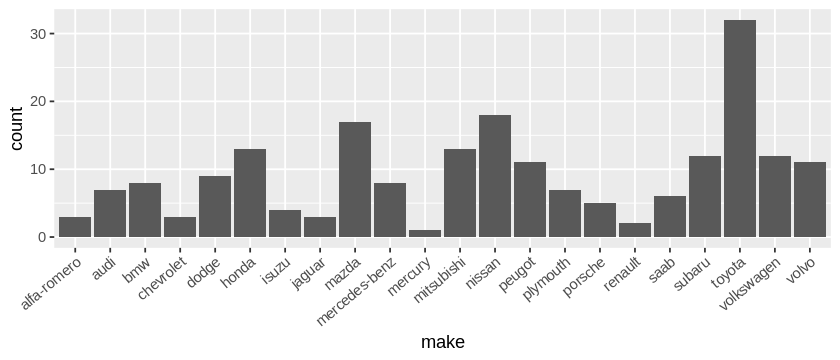

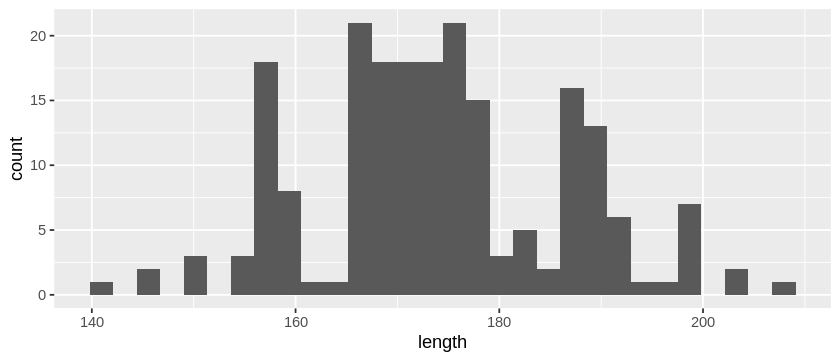

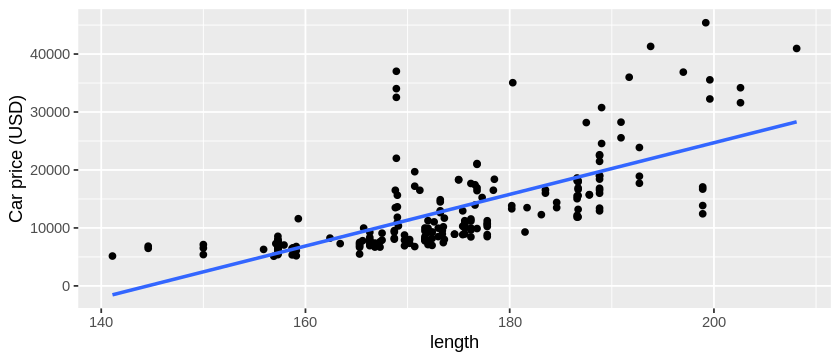

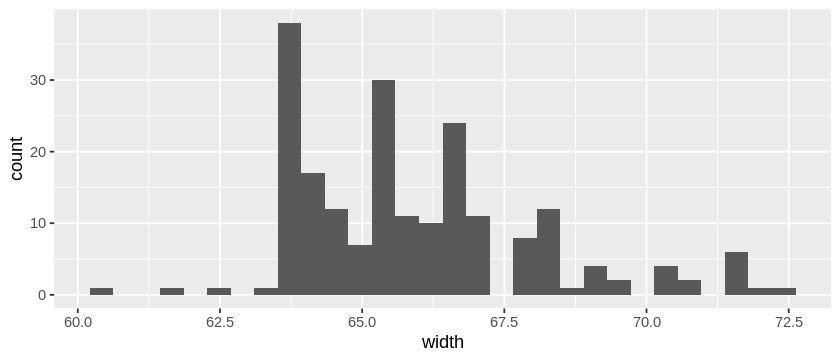

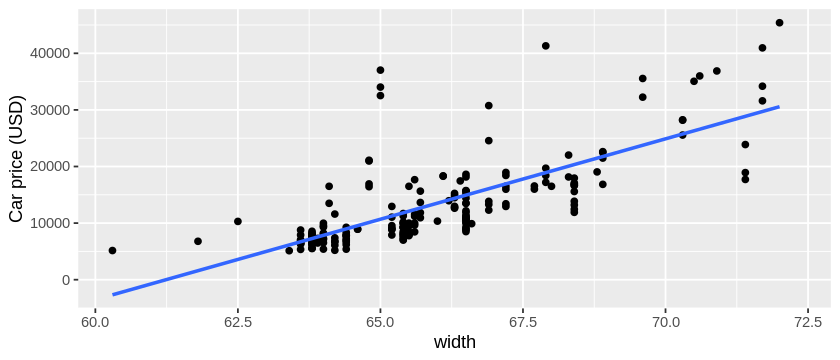

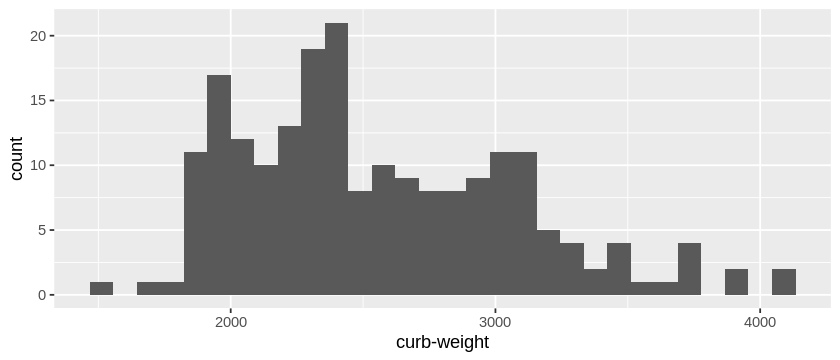

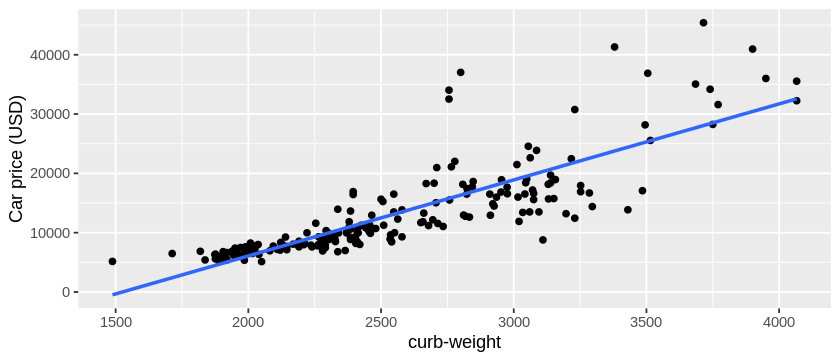

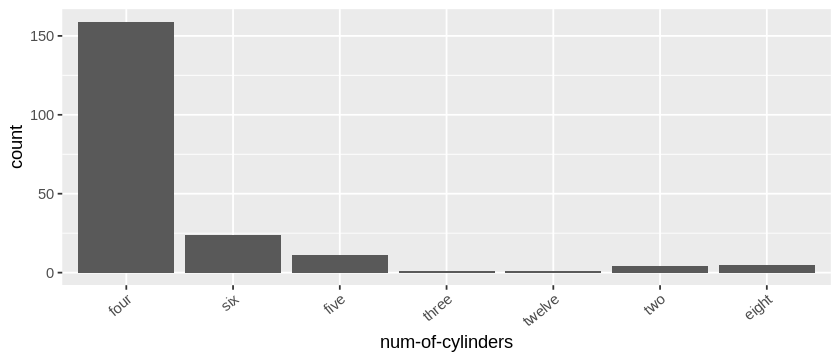

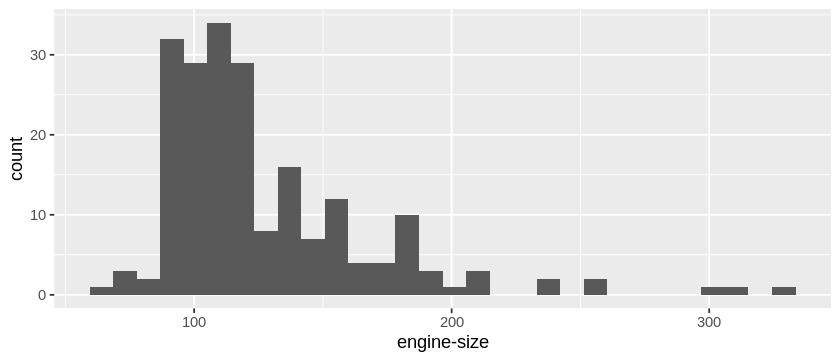

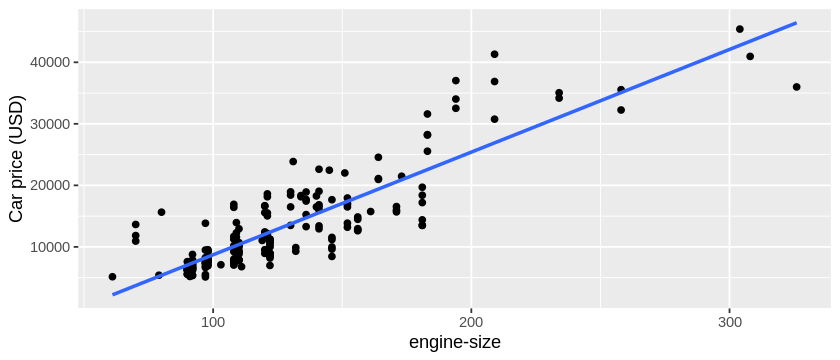

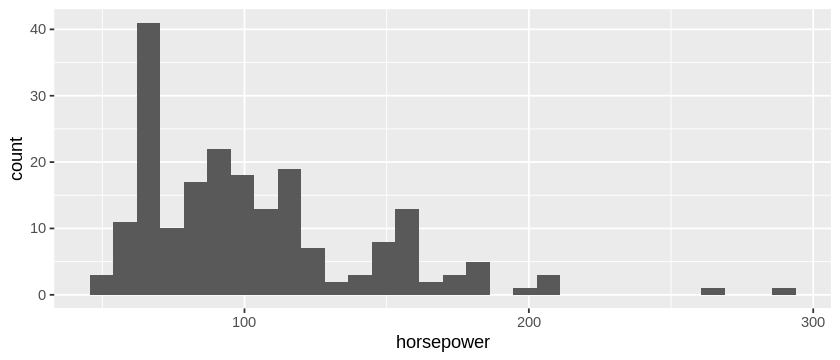

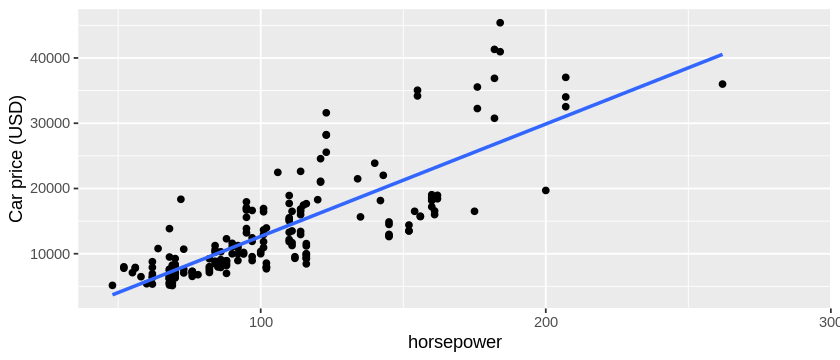

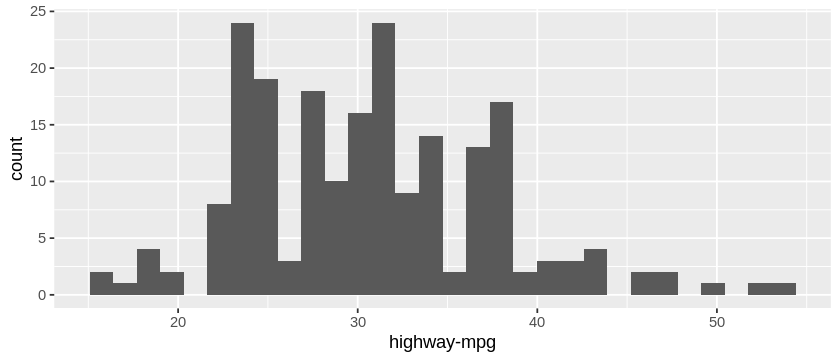

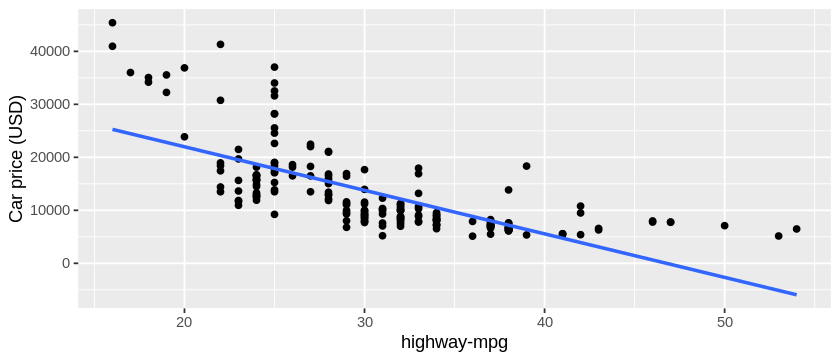

In [9]:
options(repr.plot.height = 3, repr.plot.width = 7)
for (x in 1:25){
    if (colnames(automobile[,x]) %in% nms){
    
    if (typeof(unlist(automobile[,x]))=="double"){
         print(automobile %>%
         ggplot() +
         geom_histogram(aes(x = unlist(automobile[,x])), bins = 30)+
              xlab(colnames(automobile[,x])))
        
         print(automobile %>% 
         ggplot(aes(x = unlist(automobile[,x]),y=unlist(automobile[,26]))) +
         geom_point()+
         geom_smooth(method=lm,formula=y~x,se=FALSE)+
              xlab(colnames(automobile[,x]))+
              ylab("Car price (USD)"))}
        
    else{
        print(automobile %>%
            ggplot(aes(x=unlist(automobile[,x]))) +
            geom_bar(stat="count",bins=30)+
            xlab(colnames(automobile[,x])) +
            theme(axis.text.x = element_text(angle = 40, hjust = 1)))
    
    }

}
      
    
    }

oldw <- getOption("warn")

options(warn = -1)

Here, we created plots for the top 8 predictor variables. For the numerical variables, we created both a histogram to see the distribution, and a scatterplot to see the relationship between the variable and the car price. For the categorical variables, we created a bar graph to compare the count of each category in a variable. Then, we performed analysis on the plots above: 

- For the variable `make`, we can see that Japanese brands, such as Toyota, Nissan and Mazada have the top 3 counts, which means they produce the most cars. 
- For the variable `length`, we can see the distribution is approximately normal and has a positive linear relationship with `price`. 
- For the variable `width`, we can see the distribution is approximately normal and has a positive linear relationship with `price`. 
- For the variable `curb-weight`, we can see the distribution is skewed to right and has a positive linear relationship with `price`. 
- For the variable `num-of-cylinders`, we can see that most cars have 4-cyclinders.
- For the variable `engine-size`, we can see the distribution is skewed to right and has a positive linear relationship with `price`. 
- For the variable `horse-power`, we can see the distribution is skewed to right and has a positive linear relationship with `price`.
- For the variable `highway-mpg`, we can see the distribution is approximately normal and has a negative linear relationship with `price`. 

#### **Methods**

In [10]:
#removes duplicate elements in the dataframe after omitting the NA values. 
sapply(lapply(na.omit(automobile), unique), length)




symboling normalized-losses              make         fuel-type 
                6                51                18                 2 
       aspiration      num-of-doors        body-style      drive-wheels 
                2                 3                 5                 3 
  engine-location        wheel-base            length             width 
                1                40                56                33 
           height       curb-weight       engine-type  num-of-cylinders 
               39               136                 5                 5 
      engine-size       fuel-system              bore            stroke 
               32                 6                33                31 
compression-ratio        horsepower          peak-rpm          city-mpg 
               29                48                20                25 
      highway-mpg             price 
               28               146

Since lm will automatically omit the NA values in data, we check the number of unique values if NA is removed. We notice that after we omit NA, the levels of engine-location appears to be 1. This will cause contrasts since we need a categorical variables to be factors with 2 or more levels. Thus we need to remove `engine-location`.

In [11]:
levels(automobile$`num-of-doors`)

[1] "two"  "four" "?"

We also check the levels in `num-of-doors` and realize that one of the levels is `?`, which also appears to be an NA value. Thus, we need to remove it.

First the data is prepared. The variable `num-of-doors` needs to be converted to characters and have `?`s removed and the variable `engine-location` is dropped. Them, the dataset is split into two data sets - training and testing using a 70-30% basis and the ID variables are removed.


In [12]:
set.seed(123)
drop <- "engine-location"
df_ats<-automobile[,!(names(automobile) %in% drop)]
### factor variable cannot be filtered

df_ats$`num-of-doors`<-as.character(df_ats$`num-of-doors`)

df_at<-df_ats%>%filter(`num-of-doors`!='?')%>%na.omit()

df_at$`num-of-doors`<-as.factor(df_at$`num-of-doors`)


In [13]:
set.seed(123)

#dropping engine-location variable
drop <- "engine-location"
df_no_eng_loc <-automobile[,!(names(automobile) %in% drop)]


#dropping ? level in num-of-doors
df_no_eng_loc$`num-of-doors`<-as.character(df_no_eng_loc$`num-of-doors`)

clean_automobile <-df_no_eng_loc%>%filter(`num-of-doors`!='?')%>%na.omit()

clean_automobile$`num-of-doors`<-as.factor(clean_automobile$`num-of-doors`)

#split data into training and testing
clean_automobile$ID <- 1:nrow(clean_automobile)
training_df <- sample_n(clean_automobile, size = nrow(df_at) * 0.70,
  replace = FALSE
)

testing_df <- anti_join(clean_automobile,
  training_df,
  by = "ID"
)

#remove ID variables
training_df_at <- training_df[,-26]
testing_df_at <- testing_df [,-26]

A full model is created using `lm()` with `price` as our response variable and **all input variables** as our predictor variables, using training data. A stepwise model is created using forward selection because we have more predictor variables (p) than observations (n). A backward selection and stepwise selection will not work. 

** note: We have more than 25 predictors since a lot of our predictor variables are categorical data with many levels. 

In [14]:
library(MASS)

full_mod<-lm(price ~.,data=training_df)
step_mod_fs <- stepAIC(full_mod, direction = "forward")

summary(step_mod_fs)

oldw <- getOption("warn")

options(warn = -1)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=1554.66
price ~ symboling + `normalized-losses` + make + `fuel-type` + 
    aspiration + `num-of-doors` + `body-style` + `drive-wheels` + 
    `wheel-base` + length + width + height + `curb-weight` + 
    `engine-type` + `num-of-cylinders` + `engine-size` + `fuel-system` + 
    bore + stroke + `compression-ratio` + horsepower + `peak-rpm` + 
    `city-mpg` + `highway-mpg` + ID




Call:
lm(formula = price ~ symboling + `normalized-losses` + make + 
    `fuel-type` + aspiration + `num-of-doors` + `body-style` + 
    `drive-wheels` + `wheel-base` + length + width + height + 
    `curb-weight` + `engine-type` + `num-of-cylinders` + `engine-size` + 
    `fuel-system` + bore + stroke + `compression-ratio` + horsepower + 
    `peak-rpm` + `city-mpg` + `highway-mpg` + ID, data = training_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2232.38  -394.36   -19.53   379.66  2035.72 

Coefficients: (4 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.045e+04  2.337e+04   2.159 0.034878 *  
symboling1             -1.846e+03  8.190e+02  -2.254 0.027844 *  
symboling2             -1.139e+03  7.730e+02  -1.474 0.145716    
symboling0             -8.759e+02  8.910e+02  -0.983 0.329534    
symboling-1            -1.861e+03  1.490e+03  -1.249 0.216643    
symboling-2            -1.813e+

Based on the summary we found in `sum_df` (above), we noticed that the variables:`symboling`, `make`, `body-style`, `drive-wheels`, `engine-type`, `num-of-cylinders`, and `fuel-system` have more than 2 levels. Since the shrinkage methods we are planning to use to perform model selection (LASSO and Ridge) is not possible when there are more than 2 levels in a categorical variable, the variables listed above are all dropped because of their high levels.

We then create new training and testing datasets that excludes the variables listed. We call them: 
1. `training_df_sub`
2. `testing_df_sub`


In [15]:
drops <- c("symboling","make","body-style","drive-wheels","engine-type","num-of-cylinders","fuel-system")
training_df_sub<-training_df_at[,!(names(training_df_at) %in% drops)]
testing_df_sub<-testing_df_at[,!(names(testing_df_at) %in% drops)]

head(training_df_sub)
head(testing_df_sub)

normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
95,gas,turbo,four,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114,5400,19,25,22625
118,gas,turbo,two,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30,7957
161,gas,std,two,93.7,157.3,64.4,50.8,1918,92,2.97,3.23,9.4,68,5500,37,41,5389
91,diesel,std,four,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,22.5,56,4500,34,36,7898
115,gas,std,four,98.8,177.8,66.5,55.5,2425,122,3.39,3.39,8.6,84,4800,26,32,11245
95,diesel,turbo,four,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


normalized-losses,fuel-type,aspiration,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
164,gas,std,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
164,gas,std,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
158,gas,std,four,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
121,gas,std,two,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53,5151
98,gas,std,two,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,5400,38,43,6295
81,gas,std,four,94.5,158.8,63.6,52.0,1909,90,3.03,3.11,9.6,70,5400,38,43,6575


This code prepares the dataset(s) for `glmnet()` which only takes matrices (hence `model.matrix`). The `glmnet()` function has an argument `object`, which is the formula of the model and therefore needs clear x and y variables, explaining why the training and testing datasets are split into subsets of x and y. 


In [16]:
library(glmnet)

#training matrix
x_train_mat <-model.matrix( ~ ., training_df_sub[,-18])
y_train_mat <-training_df_sub$price

#testing matrix
x_test_mat <-model.matrix( ~ ., testing_df_sub[,-18])
y_test_mat <-testing_df_sub$price

oldw <- getOption("warn")

options(warn = -1)


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2



Now our data is prepared for the `glmnet()` function, we will use `cv.glmnet` to obtain the optimal value of lambda using the training set. Since this is a LASSO model, we will use the argument `alpha=1` and `n.folds=10` to find the optimal value of lambda using cross-validation by defining a sequence of values.

Then the plot function will be used to visualise the MSE of different lambdas.

`lasso_mod` provides the  $\hat{\lambda}_{\text{min}}$  for LASSO (explained below) and `lasso_mod_1se` provides the $\hat{\lambda}_{\text{1SE}}$ for LASSO (explained below).


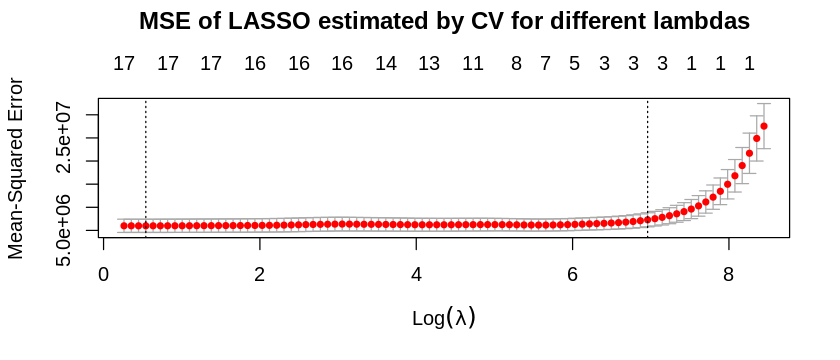

In [17]:
set.seed(123)
lasso_cv<-cv.glmnet(x=x_train_mat,y=y_train_mat,alpha=1,nfolds=10)
plot(lasso_cv, main = "MSE of LASSO estimated by CV for different lambdas\n\n")

lasso_mod<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.min)
lasso_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)

The plot shows the estimated testMSE on the y-axis for a grid of values of lambda on the x-axis (on a natural log-scale). The two vertical dotted lines show us where lambda is minimized, in other words, how many variables are needed for the best model. The numbers on the top x-axis indicate the number of inputs whose estimated coeff are different for 0 for different values of lambda. The error bars represent the variation across the different sets of the CV folds.  The left line shows $\hat{\lambda}_{\text{min}}$ - which is the minimum MSE in the grind and the right line represents $\hat{\lambda}_{\text{1SE}}$ - which is the largest values of lambda such that the corresponding MSE is still within 1 standard error of that of the minimum (more penalization at low cost). 


A similar method is followed for Ridge, except `alpha = 0`. 
`ridge_mod` provides the  $\hat{\lambda}_{\text{min}}$ for Ridge and `ridge_mod_1se` provides the  $\hat{\lambda}_{\text{1SE}}$ value for Ridge (explained above).


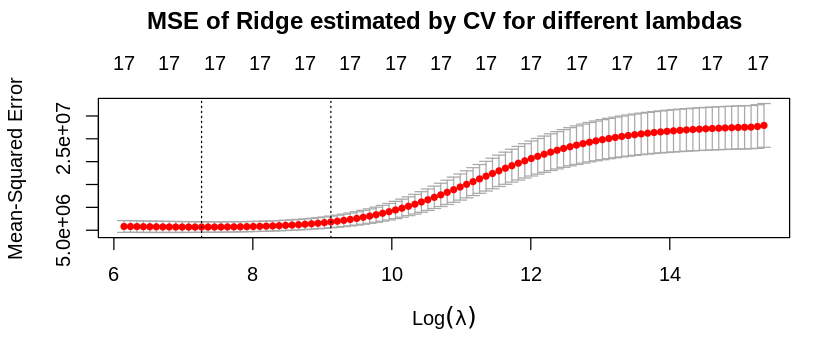

In [18]:
set.seed(123)
ridge_cv<-cv.glmnet(x=x_train_mat,y=y_train_mat,alpha=0,nfolds=10)
plot(ridge_cv, main = "MSE of Ridge estimated by CV for different lambdas\n\n")

ridge_mod<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridge_cv$lambda.min)
ridge_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridge_cv$lambda.1se)

The plot for Ridge shows the estimated testMSE’s for each value of lambda, just like that of LASSO. However the main difference here is that the top x-axis is all the same value - 17. This is because the Ridge estimator never shrinks estimates to 0, unlike LASSO. The two vertical lines represent $\hat{\lambda}_{\text{min}}$ and  $\hat{\lambda}_{\text{1SE}}$ with the x and y axis being the same as LASSO.


For explanatory analysis purposes, we will be using both $\hat{\lambda}_{\text{min}}$ and $\hat{\lambda}_{\text{1SE}}$ for both LASSO and Ridge to create four different regression models. Additionally, we also be creating an OLS model for comparison. The 5 models we will be creating are listed below: 
1. `mod_lasso`:  LASSO regression using $\lambda$ = $\hat{\lambda}_{\text{min}}$ from LASSO
2. `mod_lasso_1se`: LASSO regression using $\lambda$ = $\hat{\lambda}_{\text{1SE}}$ from LASSO
3. `ridge_mod`:  Ridge regression using $\lambda$ = $\hat{\lambda}_{\text{min}}$ from Ridge
4. `ridge_mod_1se`: Ridge regression using $\lambda$ = $\hat{\lambda}_{\text{1SE}}$ from Ridge
5. `ols_fs`: Ordinary least squares full regression using $\lambda$ = 0

After creating the 5 models, we will then obtain the out-of-sample predictions for the test sets of all five different models above, shown by `preds_1`, `preds_2`, `preds_3`, `preds_4` and `preds_5`.

Finally, we are able to compute the RMSE (root mean squared error) to evaluate the predicted models, which is clearly summarised in the tibble below.


In [19]:
set.seed(123)
kfolds=10

fold_labels <- sample(rep(seq(kfolds), length.out = nrow(training_df_sub)))
errors <- matrix(NA,ncol=5,nrow=10)
  for (fold in seq_len(kfolds)) {
    test_rows <- fold_labels == fold
    train <- training_df_sub[!test_rows, ]
    test <- training_df_sub[test_rows, ]
      
    #since the matrix size for LASSO and Ridge is different from OLS, we will be using different training and testing sets for OLS
    train_ols <- training_df_at[!test_rows, ]
    test_ols <- training_df_at[test_rows, ]
    
    x_train_mat<-model.matrix( ~ ., train[,-18])
    y_train_mat<-train$price
      
    x_test_mat<-model.matrix( ~ ., test[,-18])
    y_test_mat<-test$price
      
    # We fit the LASSO and Ridge regression models using lambda values found using cross-validation. 
    mod_lasso_min <- glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.min)
      
    mod_lasso_1se <- glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)
      
    ridge_mod_min<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridge_cv$lambda.min)
      
    ridge_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridge_cv$lambda.1se)

      
    #There is a slight issue with the variable `make`, it has new levels in new folds,
    #and the OLS model cannot perform the OLS function in the k-folds cross validation; 
    #the variable has been removed in order to successfully create our training and testing sets for our OLS model. 

    #building a matrix for the training set
    ols_x_red_train<-train_ols%>%as.data.frame()%>%dplyr::select(symboling , `normalized-losses` , make , 
    `fuel-type` , aspiration , `num-of-doors` , `body-style` , 
    `drive-wheels` , `wheel-base` , length , width , height , 
    `curb-weight` , `engine-type` , `num-of-cylinders` , `engine-size` , 
    `fuel-system` , bore ,stroke , `compression-ratio` , horsepower , 
    `peak-rpm` , `city-mpg` , `highway-mpg`)
      
    ols_x_mat_train<-model.matrix(~.,ols_x_red_train)
    
    #building a matrix for the testing set
    ols_x_red_test<-test_ols%>%as.data.frame()%>%dplyr::select(symboling , `normalized-losses` , make , 
    `fuel-type` , aspiration , `num-of-doors` , `body-style` , 
    `drive-wheels` , `wheel-base` , length , width , height , 
    `curb-weight` , `engine-type` , `num-of-cylinders` , `engine-size` , 
    `fuel-system` , bore , stroke , `compression-ratio` , horsepower , 
    `peak-rpm` , `city-mpg` , `highway-mpg`)
      
    ols_x_mat_test<-model.matrix(~.,ols_x_red_test)
      
    # we know that when lambda = 0 and alpha=1, the glmnet() performs the same as lm
    ols_fs<- glmnet(x=ols_x_mat_train,y=y_train_mat,alpha=1,lambda=0)
    
    
    #compute the cross-validation RMSE
    preds_1<-predict(mod_lasso_min,x_test_mat)
    preds_2<-predict(mod_lasso_1se,x_test_mat)
    preds_3<-predict(ridge_mod_min,x_test_mat)
    preds_4<-predict(ridge_mod_1se,x_test_mat)
    preds_5<-predict(ols_fs,ols_x_mat_test)
      
    errors[fold,1] <- sqrt(mean(y_test_mat-preds_1)^2)
    errors[fold,2] <- sqrt(mean(y_test_mat-preds_2)^2)
    errors[fold,3] <- sqrt(mean(y_test_mat-preds_3)^2)
    errors[fold,4] <- sqrt(mean(y_test_mat-preds_4)^2)
    errors[fold,5] <- sqrt(mean(y_test_mat-preds_5)^2)
  }

tibble(
    Model = c("LASSO Regression with minimum MSE", "LASSO Regression with 1SE MSE", "Ridge Regression with minimum MSE", "LASSO Regression with 1SE MSE", "OLS Full Regression"), 
    R_MSE = c(mean(errors[, 1]), mean(errors[, 2]), mean(errors[, 3]), mean(errors[, 4]), mean(errors[, 5])))
        


Model,R_MSE
<chr>,<dbl>
LASSO Regression with minimum MSE,812.0043
LASSO Regression with 1SE MSE,709.0545
Ridge Regression with minimum MSE,808.4589
LASSO Regression with 1SE MSE,855.7711
OLS Full Regression,782.8616


Through the 10 fold cross validation error (root mean squared error), we see that lasso model with $\hat{\lambda}_{\text{1SE}}$ has the lowest value. Thus we decide to use the LASSO Regression model with 1se MSE for our final predictions.

In [20]:
#redefine model matrix for training and testing
x_train_mat<-model.matrix( ~ ., training_df_sub[,-18])
y_train_mat<-training_df_sub$price

x_test_mat<-model.matrix( ~ ., testing_df_sub[,-18])
y_test_mat<-testing_df_sub$price

In [21]:
#compute the RMSPE (the prediction error) on the test set to evaluate our final LASSO model
lasso_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)

preds<-predict(lasso_mod_1se,x_test_mat)

sqrt(mean(y_test_mat-preds)^2)

[1] 65.42748

Based on the output above, we obtained a root mean squared prediction error of 65.427 when using the LASSO Regression model on the test set.


In [22]:
coef_mat<-coef(lasso_mod_1se)

summs <- summary(coef_mat)

vars_df<-data.frame(kept_variables = rownames(coef_mat)[summs$i],
           coefficient = summs$x)

vars_df

kept_variables,coefficient
<chr>,<dbl>
(Intercept),-15273.681895
width,113.378826
`curb-weight`,7.309715
horsepower,13.261481


 Taking a look at the coefficients of our model, we noticed that the LASSO model had selected only three variables, which are `width`, `curb-weight`, and `horsepower`, while all the coefficients of other input variables were reduced to 0.

## **Discussion**



### Expect to Achieve
We expect to create a best fitting model that allows us to predict the price of a car in USD based on variables that we selected through statistical methods. We also expect our model to have a low RMSE value to obtain higher accuracy. 

### Impact
Based on our model, we will be able to decide which variables contribute to the price of a car and this generative model will be  beneficial for building the predictive model. Such a model could not only provide the expected price of a new car to customers, but also help sellers of second-hand cars set ideal prices. 


## **References**

Schlimmer, Jeffrey C. (1987). “Automobile Data Set.” Machine Learning Repository,  https://archive.ics.uci.edu/ml/datasets/Automobile 

Balce, Andım. (2016). Factors Affecting Prices In An Used Car E-Market. Journal of Internet Applications and Management. 7. 5-20. 10.5505/iuyd.2016.30974. 

Erdem, Cumhur & Şentürk, İsmail. (2009). A Hedonic Analysis of Used Car Prices in Turkey. International Journal of Economic Perspectives. 3. 141-149. 
